In [5]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
folder = 'Baza_zdjec_przerobiona/s'
folder_docelowy = '../../Dane/Baza_zdjec_zlaczone_2/'
slesh = '/'
png = '.png'

In [8]:
#Tablica przechowująca zdjęcia osób
people = []
for i in range(1,41):
    images = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    people.append(images)
   



valid_ppl =[]

for i in range(33,37):
    images_4 = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images_4.append(arr_im) 
    valid_ppl.append(images_4) 
    

test_ppl = []    
for i in range(37,41):
    images_2 = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images_2.append(arr_im) 
    test_ppl.append(images_2) 
    

In [9]:
# Tworzenie zbioru testowego

#Laczna ilosc zdjec
lacznie = 25200

train = int(0.8*lacznie)      # 80% próbek jest treningowych
test = int(0.1*lacznie)        # 10% próbek jest testowych
valid = int(0.1*lacznie)        # 10% próbek jest testowych

ilosc = 40
rozmiar = 10
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab_train = np.zeros(train, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy+'Train_2/'
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(0,32):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                con = np.concatenate((people[i][j+l], people[i][9-k+l]), axis=1)
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(con)
                con.save(folder_docelowy+'Train_2/'+str(n)+png) 
      
                poloczone.append(con)
                tab_train[n] = 1
                n = n + 1
                
print(n)

10080


In [10]:
x = 0 #Zamiast n 

#polaczone = n
m = 33
rozne = []


for i in range(32):

    rand_1 = random.randint(0,8)
    rand_2 = random.randint(0,8)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
                con = np.concatenate((people[i][10*rand_1+j], people[i+k][10*rand_2+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne.append(con)
print(x)


49600


In [11]:
for i in range(train - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(folder_docelowy+'Train_2/'+str(n)+png) 
    
    poloczone.append(con)
    
    tab_train[n] = 0
    n = n + 1
    
    
    

In [12]:
print(n)
print(len(tab_train))

print(tab_train[20000])

20160
20160
0


In [13]:
#Zapis tablicy do pliku CSV
tab_train.tofile(folder_docelowy+'Train_2/'+'train_2.csv', sep = ' ')   

In [14]:
# Tworzenie zbioru validacyjnego

In [15]:
ilosc = 40
rozmiar = 10
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab_valid = np.zeros(test, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy+'Valid_2/'
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(32,36):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                con = np.concatenate((people[i][j+l], people[i][9-k+l]), axis=1)
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(con)
                con.save(folder_docelowy+'Valid_2/'+str(n)+png) 
      
                poloczone.append(con)
                tab_valid[n] = 1
                n = n + 1
                
print(n)

1260


In [16]:
x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_valid = []


for i in range(4):

    rand_1 = random.randint(2,5)
    rand_2 = random.randint(2,5)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
                con = np.concatenate((valid_ppl[i][10*rand_1+j], valid_ppl[i+k][10*rand_2+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne_valid.append(con)
                
                con = np.concatenate((valid_ppl[i][10*(rand_1+2)+j], valid_ppl[i+k][10*(rand_2+2)+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne_valid.append(con)
                
                con = np.concatenate((valid_ppl[i][10*(rand_1-2)+j], valid_ppl[i+k][10*(rand_2-2)+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne_valid.append(con)
                
print(x)

1800


In [17]:
for i in range(valid - n):
    
    rand_2 = random.randint(0,x-1)
    
    con = rozne_valid[rand_2]
    
    con.save(folder_docelowy+'Valid_2/'+str(n)+png) 
    
    poloczone.append(con)
    
    tab_valid[n] = 0
    n = n + 1
    
print(n)
print(len(tab_valid))

2520
2520


In [18]:
#Zapis tablicy do pliku CSV
tab_valid.tofile(folder_docelowy+'Valid_2/'+'valid_2.csv', sep = ' ')   

In [19]:
# Tworzenie zbioru testowego

In [20]:
ilosc = 40
rozmiar = 10
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab = np.zeros(test, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy+'Test_2/'
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(36,40):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                con = np.concatenate((people[i][j+l], people[i][9-k+l]), axis=1)
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(con)
                con.save(folder_docelowy+'Test_2/'+str(n)+png) 
      
                poloczone.append(con)
                tab[n] = 1
                n = n + 1
                
print(n)

1260


In [21]:
x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_test = []


for i in range(4):

    rand_1 = random.randint(2,5)
    rand_2 = random.randint(2,5)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
                con = np.concatenate((test_ppl[i][10*rand_1+j], test_ppl[i+k][10*rand_2+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne_test.append(con)
                
                con = np.concatenate((test_ppl[i][10*(rand_1+2)+j], test_ppl[i+k][10*(rand_2+2)+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne_test.append(con)
                
                con = np.concatenate((test_ppl[i][10*(rand_1-2)+j], test_ppl[i+k][10*(rand_2-2)+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne_test.append(con)
                
print(x)

1800


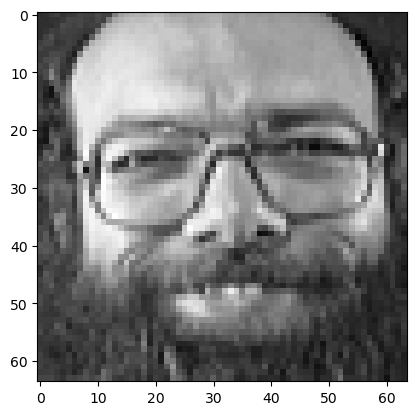

In [22]:
a = 2500
plt.imshow(test_ppl[0][1], cmap = 'gray')

In [23]:
for i in range(test - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne_test[rand_1]
    
    con.save(folder_docelowy+'Test_2/'+str(n)+png) 
    
    poloczone.append(con)
    
    tab[n] = 0
    n = n + 1
    
print(n)
print(len(tab))

2520
2520


In [24]:
#Zapis tablicy do pliku CSV
tab.tofile(folder_docelowy+'Test_2/'+'test_2.csv', sep = ' ')   

In [25]:
print(len(poloczone))

2520


0


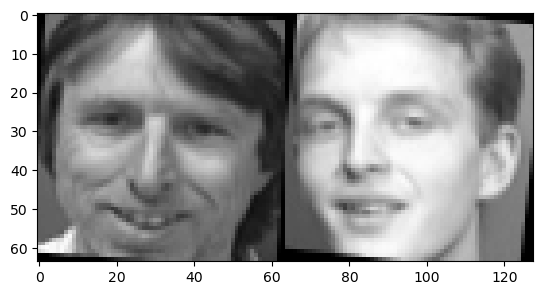

In [26]:
a = 2500
plt.imshow(poloczone[2000], cmap = 'gray')
print(tab[a])

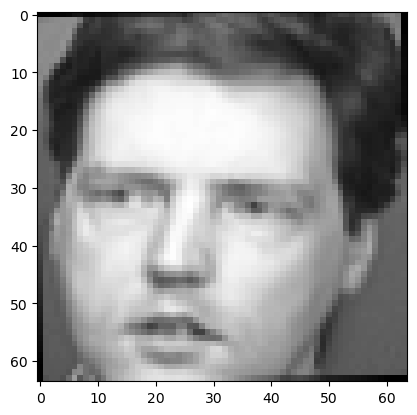

In [27]:
plt.imshow(test_ppl[1][10], cmap = 'gray')